# CPHASE: leakage vs gate time

In [31]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import constants
from typing import List, Dict, Callable
import matplotlib
import copy
import json

In [32]:
with open("cphase_data/leakage_vs_gate_time_data.txt") as my_file:
    result = json.load(my_file)

In [40]:
def plot_leakage(
    result: List[Dict],
    plot_setup={'fs': 20, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False,
    dark = False
):
    if dark:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')
        
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    fig, ax = plt.subplots(figsize=(8, 6))
    colors_list = ["yellow", "red", "blue", "darkorange"]
    count = 0
    labels_list = ["$\pi$", "$5\pi/4$", "$3 \pi/2$", "$7 \pi/4$"]
    for res in result:
        ax.semilogy(res["gate_time_list"], res["avg_leakage"], linewidth=plot_setup["lw"], 
                color=colors_list[count], label=labels_list[count])
        ax.semilogy(res["gate_time_list"], res["avg_leakage_noise"], linewidth=plot_setup["lw"], 
                color=colors_list[count], linestyle='--')
        count += 1
    ax.set_xlabel("$t_{\\mathrm{gate}} \, (\\mathrm{ns})$", fontsize=plot_setup["fs"])
    ax.set_ylabel("$L_1$", fontsize=plot_setup["fs"])
    x_ticks = [70 + 10*x for x in range(0, 8)]
    ax.set_xticks(x_ticks)
    x_tick_labels = ['$' + str(x) + '$' for x in x_ticks ]
    y_ticks = [0.01, 0.001, 0.0001]
    ax.set_yticks(y_ticks)
    y_tick_labels = ['$10^{-2}$', '$10^{-3}$', '$10^{-4}$']
    ax.set_yticklabels(y_tick_labels)
    ax.set_xticklabels(x_tick_labels)
    ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    plt.legend(fontsize=plot_setup["fsl"])
    if save:
        plt.savefig("cphase_leakage_fig.svg")
    plt.show()
    
    

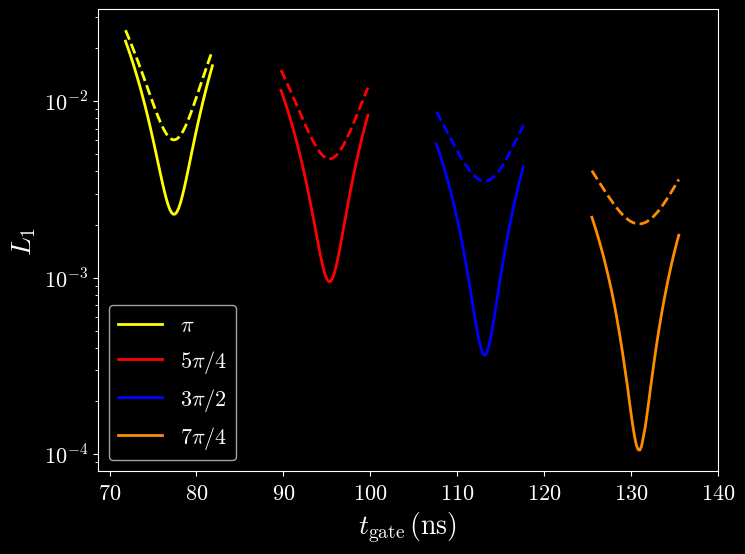

In [42]:
plot_leakage(result, save=False, dark=True)

In [70]:
f_avg = 0
f_avg_noise = 0
for res in result:
    f_avg += res["gate_fid"]/4
    f_avg_noise += res["gate_fid_noise"]/4
print("Average fidelity = {}".format(f_avg))
print("Average fidelity noise= {}".format(f_avg_noise))

Average fidelity = 0.9984873952076349
Average fidelity noise= 0.9922736687001195


In [35]:
help(plt.style.use)

Help on function use in module matplotlib.style.core:

use(style)
    Use Matplotlib style settings from a style specification.
    
    The style name of 'default' is reserved for reverting back to
    the default style settings.
    
    .. note::
    
       This updates the `.rcParams` with the settings from the style.
       `.rcParams` not defined in the style are kept.
    
    Parameters
    ----------
    style : str, dict, Path or list
        A style specification. Valid options are:
    
        +------+-------------------------------------------------------------+
        | str  | The name of a style or a path/URL to a style file. For a    |
        |      | list of available style names, see `style.available`.       |
        +------+-------------------------------------------------------------+
        | dict | Dictionary with valid key/value pairs for                   |
        |      | `matplotlib.rcParams`.                                      |
        +------+-----